In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, recall_score, precision_score

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1Ej-GyEuymw1ibryRYiH7daLFVOhn0qNN'}) 
downloaded.GetContentFile('edited_data.csv') 

In [0]:
""" Importing Dataset """
online_data = pd.read_csv('edited_data.csv')
online_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [0]:
online_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'r

In [0]:
for i in online_data.columns:
  print(i,':',len(online_data[i].unique()),'labels')

n_tokens_title : 20 labels
n_tokens_content : 2395 labels
n_unique_tokens : 27214 labels
n_non_stop_words : 1444 labels
n_non_stop_unique_tokens : 22876 labels
num_hrefs : 133 labels
num_self_hrefs : 59 labels
num_imgs : 88 labels
num_videos : 53 labels
average_token_length : 30056 labels
num_keywords : 10 labels
data_channel_is_lifestyle : 2 labels
data_channel_is_entertainment : 2 labels
data_channel_is_bus : 2 labels
data_channel_is_socmed : 2 labels
data_channel_is_tech : 2 labels
data_channel_is_world : 2 labels
kw_min_min : 26 labels
kw_max_min : 1046 labels
kw_avg_min : 16934 labels
kw_min_max : 1018 labels
kw_max_max : 35 labels
kw_avg_max : 30755 labels
kw_min_avg : 15934 labels
kw_max_avg : 19385 labels
kw_avg_avg : 39179 labels
self_reference_min_shares : 1255 labels
self_reference_max_shares : 1137 labels
self_reference_avg_sharess : 8602 labels
weekday_is_monday : 2 labels
weekday_is_tuesday : 2 labels
weekday_is_wednesday : 2 labels
weekday_is_thursday : 2 labels
weekday_

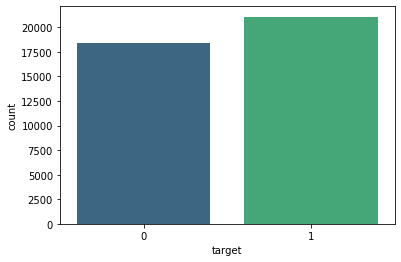

In [0]:
"""to check whether the target feature is balanced or imbalanced"""
sns.countplot(x = "target", data = online_data, palette = "viridis")

In [0]:
"""feature scaling"""
scaler = MinMaxScaler()
X = online_data.drop("target", axis = 1)
Y = online_data['target']
X[X.columns] = scaler.fit_transform(X[X.columns])

In [0]:
"""feature selection techniques and their comparison"""
"""METHOD 1 : feature selection : Kbest"""
kbest = SelectKBest(score_func = f_classif, k = 12)
kfit = kbest.fit(X,Y)
scores = pd.DataFrame(kfit.scores_)
columns = pd.DataFrame(X.columns)
kbest_FeatureScores = pd.concat([columns, scores], axis = 1)
kbest_FeatureScores.columns = ["feature", "score"]

In [0]:
print(kbest_FeatureScores.nlargest(36,'score'))

                          feature        score
25                     kw_avg_avg  1109.064201
38                         LDA_02  1034.137605
16          data_channel_is_world   959.758789
12  data_channel_is_entertainment   524.473854
14         data_channel_is_socmed   502.754873
34            weekday_is_saturday   474.895111
15           data_channel_is_tech   422.287504
40                         LDA_04   359.317454
5                       num_hrefs   322.828967
23                     kw_min_avg   322.598210
35              weekday_is_sunday   278.105160
37                         LDA_01   252.174705
24                     kw_max_avg   245.407210
42      global_sentiment_polarity   215.038039
10                   num_keywords   212.121840
46            rate_negative_words   202.767462
36                         LDA_00   181.196827
41            global_subjectivity   180.599982
7                        num_imgs   173.787436
28     self_reference_avg_sharess   170.465684
27      self_

In [0]:
X_kbest = X[['kw_avg_avg','LDA_02','data_channel_is_world','data_channel_is_entertainment','data_channel_is_socmed','weekday_is_saturday','data_channel_is_tech','kw_min_avg','LDA_04','num_hrefs','kw_max_avg','weekday_is_sunday','LDA_01','kw_avg_min','global_sentiment_polarity','num_keywords','global_subjectivity','rate_negative_words','num_imgs','LDA_00','self_reference_avg_sharess','LDA_03','global_rate_positive_words','self_reference_max_shares','n_non_stop_unique_tokens','title_sentiment_polarity','kw_max_min','self_reference_min_shares','kw_min_min','n_unique_tokens','n_tokens_title','weekday_is_wednesday','abs_title_sentiment_polarity','n_tokens_content']]


In [0]:
#We're gonna fit a logistic model on these features
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_kbest, Y, test_size = 0.3, random_state = 1)
#fitting the classifier
log1 = LogisticRegression()
log1.fit(x_train1, y_train1)
#prediction and accuracy
y_pred1 = log1.predict(x_test1)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pd.DataFrame(data=[accuracy_score(y_test1, y_pred1), recall_score(y_test1, y_pred1),
                   precision_score(y_test1, y_pred1), roc_auc_score(y_test1, y_pred1)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])
#After fitting the model on our selected features, we get the following results 


,0
accuracy,0.650502
recall,0.707329
precision,0.665047
roc_auc_score,0.645750


In [0]:
y_pred1l = log1.predict_proba(x_test1)
log_loss(y_test1, y_pred1l, eps=1e-15, normalize=True, sample_weight=None, labels=None)    


0.6294183034701936

In [0]:
""" METHOD 2 : feature importance"""
fi = LogisticRegression()
fi.fit(X,Y)
feat_importances = pd.Series(fi.feature_importances_, index=X.columns)
feat_importances
f = feat_importances.sort_values( ascending = False )
final = pd.DataFrame(f)
final['features'] = final.index


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#We will also 36 features for this column too
feat = final.iloc[0:36,1]
X_features = X[feat]
#We will see the results of logistic model using the features selected by this method
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_features, Y, test_size = 0.3, random_state = 1)
#fitting the classifier
log2 = LogisticRegression()
log2.fit(x_train2, y_train2)
y_pred2 = log2.predict(x_test2)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pd.DataFrame(data=[accuracy_score(y_test2, y_pred2), recall_score(y_test2, y_pred2),
                   precision_score(y_test2, y_pred2), roc_auc_score(y_test2, y_pred2)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])
#After fitting the model on these features, we get following results


,0
accuracy,0.624779
recall,0.712496
precision,0.635209
roc_auc_score,0.617443


In [0]:
y_pred2l = log2.predict_proba(x_test2)
log_loss(y_test2, y_pred2l, eps=1e-15, normalize=True, sample_weight=None, labels=None)    


0.6485885103134553

In [0]:
""" METHOD 3 : recursive feature elimination  """
log3 = LogisticRegression()
rfe = RFE(estimator = log3,step = 1)
rfe = rfe.fit(X,Y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
# printing summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)
ranks = pd.DataFrame(rfe.ranking_)
cols = pd.DataFrame(X.columns)
rfe_scores = pd.concat([cols, ranks], axis = 1)
rfe_scores.columns = ["feature", "score"]
rfe_scores


[False  True False  True False  True  True  True False  True  True False
  True False  True  True False  True  True  True  True False False False
  True  True  True  True  True False False False False False  True  True
  True False  True False False  True False  True  True False  True False
  True False False False False False False False False]
[29  1  2  1  4  1  1  1 26  1  1 15  1  5  1  1 16  1  1  1  1 19 20 13
  1  1  1  1  1 10  8  7  9 11  1  1  1 12  1 14 21  1 23  1  1 27  1  6
  1 30 24 25 22 18  3 17 28]


,feature,score
0,n_tokens_title,29
1,n_tokens_content,1
2,n_unique_tokens,2
3,n_non_stop_words,1
4,n_non_stop_unique_tokens,4
5,num_hrefs,1
6,num_self_hrefs,1
7,num_imgs,1
8,num_videos,26
9,average_token_length,1


In [0]:
X_rfe = X[['n_tokens_content','n_non_stop_words','num_hrefs','num_self_hrefs','num_imgs','average_token_length','num_keywords','data_channel_is_entertainment','data_channel_is_socmed','data_channel_is_tech','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','weekday_is_saturday','weekday_is_sunday','LDA_00','LDA_02','global_subjectivity','global_rate_positive_words','global_rate_negative_words','rate_negative_words','min_positive_polarity']]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X_rfe, Y, test_size = 0.3, random_state = 1)
#fitting the classifier
log4 = LogisticRegression()
log4.fit(x_train3, y_train3)
y_pred3 = log4.predict(x_test3)
pd.DataFrame(data=[accuracy_score(y_test3, y_pred3), recall_score(y_test3, y_pred3),
                   precision_score(y_test3, y_pred3), roc_auc_score(y_test3, y_pred3)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
accuracy,0.651936
recall,0.707485
precision,0.666667
roc_auc_score,0.647290


In [0]:
y_pred3l = log4.predict_proba(x_test3)
log_loss(y_test3, y_pred3l, eps=1e-15, normalize=True, sample_weight=None, labels=None)    
#We are getting a logloss of 0.62


0.6289101831494195

In [0]:
y_pred4l = log5.predict_proba(x_test4)
log_loss(y_test4, y_pred4l, eps=1e-15, normalize=True, sample_weight=None, labels=None)    


0.6289101206122159

In [0]:
""" changing the threshold value  """

x_train5, x_test5, y_train5, y_test5 = train_test_split(X_rfe, Y, test_size = 0.3, random_state = 1)


X_rfe, Y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)

log6 = LogisticRegression(class_weight="balanced")
log6.fit(x_train5, y_train5)
THRESHOLD = 0.25
y_pred5 = np.where(log6.predict_proba(x_test5)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test5, y_pred5), recall_score(y_test5, y_pred5),
                   precision_score(y_test5, y_pred5), roc_auc_score(y_test5, y_pred5)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
accuracy,0.560934
recall,0.982148
precision,0.551918
roc_auc_score,0.525711


In [0]:
#trying for another threshold value
log7 = LogisticRegression(class_weight="balanced")
log7.fit(x_train5, y_train5)
THRESHOLD = 0.75
y_preddd = np.where(log7.predict_proba(x_test5)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test5, y_pred5), recall_score(y_test5, y_pred5),
                   precision_score(y_test5, y_pred5), roc_auc_score(y_test5, y_pred5)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
accuracy,0.560934
recall,0.982148
precision,0.551918
roc_auc_score,0.525711


In [0]:
""" RandomForestClassifier """ 
xtrain7, xtest7, ytrain7, ytest7 = train_test_split(X_rfe, Y, test_size = 0.3, random_state =1)
RFC = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 12)
RFC.fit(xtrain7, ytrain7)
y_pred7 = RFC.predict(xtest7)
pd.DataFrame(data=[accuracy_score(ytest7, y_pred7), recall_score(ytest7, y_pred7),
                   precision_score(ytest7, y_pred7), roc_auc_score(ytest7, y_pred7)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


,0
accuracy,0.983333
recall,0.909091
precision,0.937500
roc_auc_score,0.950800


In [0]:
y_pred7l = RFC.predict_proba(xtest7)
log_loss(ytest7, y_pred7l, eps=1e-15, normalize=True, sample_weight=None, labels=None)    


0.186321557674618